In [ ]:
# clear output esc r y
# https://scikit-learn.org/stable/modules/unsupervised_reduction.html
# https://scikit-learn.org/stable/modules/feature_selection.html

#import csv
#with open('X_train.csv', newline='') as csvfile:
import pandas as pd
import numpy as np

xdata = pd.read_csv ('X_train.csv', nrows=5)
ydata = pd.read_csv('y_train.csv',nrows=5)

merged = pd.concat([xdata, ydata['y']], axis=1, sort=False)
print(xdata.drop(['id'],axis=1))
#print(ydata['y'])
#print(np.transpose(ydata.values)[1:][0])
#print(len(np.transpose(xdata.values)[1:]))



In [9]:
# Recursive feature elimination

from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

import pandas as pd
import numpy as np
  
xdata = pd.read_csv('x_train_mean.csv',nrows=50)
ydata = pd.read_csv('y_train.csv',nrows=50)

X=xdata.drop(['id'],axis=1)
y=ydata['y']

estimator = SVR(kernel="linear")

selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
selector.support_
selector.ranking_



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

We started with 831 features but retained only 448 of them!


IndexError: boolean index did not match indexed array along dimension 0; dimension is 831 but corresponding boolean dimension is 832

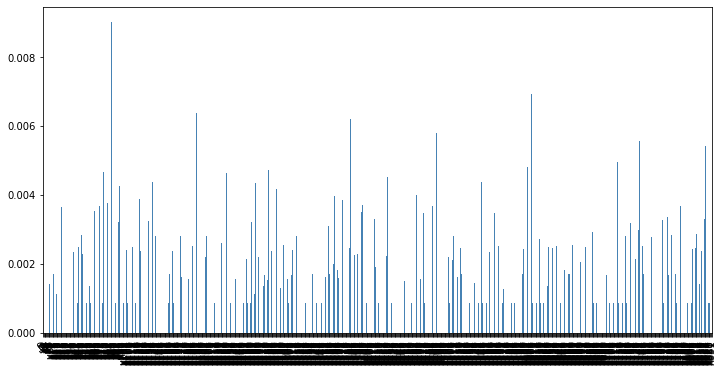

In [26]:
# https://www.kaggle.com/residentmario/automated-feature-selection-with-sklearn

from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
  
xdata = pd.read_csv('x_train_mean.csv')
ydata = pd.read_csv('y_train.csv')

X=xdata.drop(['id'],axis=1)
y=ydata['y']

clf = DecisionTreeClassifier()
clf.fit(X, y)

pd.Series(clf.feature_importances_, index=X.columns[0:]).plot.bar(color='steelblue', figsize=(12, 6))

from sklearn.feature_selection import SelectFromModel

clf = DecisionTreeClassifier()
trans = SelectFromModel(clf, threshold='median')
kepler_X_trans = trans.fit_transform(X, y)

print("We started with {0} features but retained only {1} of them!".format(X.shape[1] - 1, kepler_X_trans.shape[1]))
columns_retained_FromMode = X.iloc[:, 1:].columns[trans.get_support()].values

In [13]:
#GenericUnivariateSelect
# https://www.kaggle.com/residentmario/automated-feature-selection-with-sklearn

from sklearn.feature_selection import GenericUnivariateSelect
import pandas as pd
import numpy as np
  
xdata = pd.read_csv('x_train_mean.csv')
ydata = pd.read_csv('y_train.csv')

X=xdata.drop(['id'],axis=1)
y=ydata['y']

trans = GenericUnivariateSelect(score_func=lambda X, y: X.mean(axis=0), mode='percentile', param=50)
chars_X_trans = trans.fit_transform(X, y)

print("We started with {0} features but retained only {1} of them!".format(X.shape[1], chars_X_trans.shape[1]))


We started with 832 features but retained only 416 of them!


In [18]:
#pt 2
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_classif

import pandas as pd
import numpy as np
  
xdata = pd.read_csv('x_train_mean.csv',nrows=20)
ydata = pd.read_csv('y_train.csv',nrows=20)

X=xdata.drop(['id'],axis=1)
y=ydata['y']

#kepler_mutual_information = mutual_info_classif(X, y)

trans = GenericUnivariateSelect(score_func=mutual_info_classif, mode='percentile', param=50)
kepler_X_trans = trans.fit_transform(X, y)

print("We started with {0} features but retained only {1} of them!".format(X.shape[1] - 1, kepler_X_trans.shape[1]))


We started with 831 features but retained only 416 of them!


In [9]:
#Decision Tree Regression
# http://www.webgraphviz.com then copy .dot file

# import numpy package for arrays and stuff 
import numpy as np  
  
# import matplotlib.pyplot for plotting our result 
import matplotlib.pyplot as plt 
  
# import pandas for importing csv files  
import pandas as pd  

from sklearn.tree import DecisionTreeRegressor  
  
xdata = pd.read_csv('x_train_mean.csv')
ydata = pd.read_csv('y_train.csv')

X=xdata.drop(['id'],axis=1)
y=ydata['y']
    
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 


# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regressor, out_file ='tree.dot')


In [5]:
#Feature selection using embedded method
import pandas as pd
import scipy.stats as sst
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

xdata = pd.read_csv('x_train_mean.csv',nrows=10)
ydata = pd.read_csv('y_train.csv',nrows=10)

X=xdata.drop(['id'],axis=1)
y=ydata['y']

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Maximum value in each column : 
6.503016520821267e+18
Maximum value in each column : 
-3.76020076348273e+22
False
True
Best alpha using built-in LassoCV: 31006708878259097960448.000000
Best score using built-in LassoCV: 0.000000


In [49]:
# Feature selection using Pearson Correlation
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
import pandas as pd
import scipy.stats as sst
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

xdata = pd.read_csv('X_train.csv')
ydata = pd.read_csv('y_train.csv')

merged = pd.concat([xdata, ydata['y']], axis=1, sort=False)

#df1 = merged.iloc[:, 0:]
#plt.figure(figsize=(len(merged),len(merged)))
cor = merged.corr()
#sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)

#Correlation with output variable
cor_target = abs(cor["y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

print(merged[['x183','x537']].corr()) # not correlated so we don't drop either


          x183      x537
x183  1.000000 -0.083316
x537 -0.083316  1.000000


In [ ]:
# Feature selection using Chi2 test
#Doesn't work since its a cmbi of features

import pandas as pd
import scipy.stats as sst

xdata = pd.read_csv('X_train.csv')
ydata = pd.read_csv('y_train.csv')

xdatabycol = np.transpose(xdata.values)[1:] #line 0 -> x0 etc.
ydatabycol = np.transpose(ydata.values)[1:][0]

for attr_index in range(len(xdatabycol)):
    #attr_sol = np.column_stack(xdatabycol[attr_index],ydatabycol)
    crosstab = pd.crosstab(xdatabycol[attr_index],ydatabycol)
    chi2,p,_,_ = sst.chi2_contingency(crosstab)
    if (p > 0.05):
        print(attr_index)


In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

df = pd.read_csv('X_train.csv',nrows=5)

>>> 
>>> X, y = load_iris(return_X_y=True)
>>> X.shape
(150, 4)
>>> clf = ExtraTreesClassifier(n_estimators=50)
>>> clf = clf.fit(X, y)
>>> clf.feature_importances_  
array([ 0.04...,  0.05...,  0.4...,  0.4...])
>>> model = SelectFromModel(clf, prefit=True)
>>> X_new = model.transform(X)
>>> X_new.shape               
(150, 2)

In [ ]:
# 1.13.1. Removing features with low variance


from sklearn.feature_selection import VarianceThreshold
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

df = pd.read_csv ('x_train_KNN.csv',nrows=10)

#p = 0.80
#sel = VarianceThreshold(threshold=(p * (1 - p)))

mapper = DataFrameMapper([(df.columns, StandardScaler())])
scaled_features = mapper.fit_transform(df.copy())
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

#print(df_fitted)

print(scaled_features_df == df)
print(scaled_features_df)
    
#for index, row in df.iterrows():
#    print(row)
#    for attr in row:
#        print(row(attr))
    
#    print("---------------")
   


# for attr in range(df.shape[1]):
#        print(row)
#        print(attr)
#        if (dfcopy[row][attr] != df_fitted[row][attr]):
#            print(i)
#            print(dfcopy[row][attr])
#            print(df_fitted[row][attr])

np.array_equal(scaled_features_df,df)

In [ ]:
##unsupervised dim reduc https://scikit-learn.org/stable/modules/unsupervised_reduction.html

## FEATURE AGGLOMERATION

from sklearn.cluster import FeatureAgglomeration
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv ('x_train_KNN.csv',nrows=10)
labels = pd.read_csv('Y_train.csv',nrows=10)

#set n_clusters to 2, the output will be two columns of agglomerated features ( iris has 4 features)
agglo=FeatureAgglomeration(n_clusters=2).fit_transform(labels)

print(agglo)
print(agglo[:,0])

#plotting
#color=[]
#for i in labels:
#    if i=='Iris-setosa':
#        color.append('g')
#    if  i=='Iris-versicolor':
#        color.append('b')
#    if i=='Iris-virginica':
#        color.append('r')
#plt.scatter(agglo[:,0],agglo[:,1],c=color)
#plt.show()


